In [1]:
# Importações dos módulos necessários para autenticar na minha conta Google e acessar o Drive
import matplotlib.pyplot as plt
import pandas, numpy, requests, gspread

from matplotlib.pylab     import rcParams
from pandas.plotting      import register_matplotlib_converters
from google.colab         import auth
from google.auth          import default
from oauth2client.client  import GoogleCredentials

# Ajustes feitos para geração e criação de gráfico
rcParams['figure.figsize'] = 15, 6
register_matplotlib_converters()

In [2]:
# Acessando a planilha e carregando para um DataFrame
auth.authenticate_user()

creds, _ = default()

gc = gspread.authorize(creds)

# spreadsheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/google_sheet_id/edit#gid=0')
spreadsheet = gc.open_by_key('1N9-2eVyEaf3oStqzn46DED7JE6VL442oklB2KXtxOrQ')

wks = spreadsheet.worksheet('planilha1')

data = wks.get_all_values()

headers = data.pop(0)

df = pandas.DataFrame(data, columns=headers)
# df

In [3]:
# Verificando se a carga do arquivo foi feita na moral
df.columns

Index(['EstacaoCodigo', 'NivelConsistencia', 'Data', 'MediaDiaria',
       'MetodoObtencaoVazoes', 'Maxima', 'Minima', 'Media', 'DiaMaxima',
       'DiaMinima', 'MaximaStatus', 'MinimaStatus', 'MediaStatus',
       'MediaAnual', 'MediaAnualStatus', 'Vazao01', 'Vazao02', 'Vazao03',
       'Vazao04', 'Vazao05', 'Vazao06', 'Vazao07', 'Vazao08', 'Vazao09',
       'Vazao10', 'Vazao11', 'Vazao12', 'Vazao13', 'Vazao14', 'Vazao15',
       'Vazao16', 'Vazao17', 'Vazao18', 'Vazao19', 'Vazao20', 'Vazao21',
       'Vazao22', 'Vazao23', 'Vazao24', 'Vazao25', 'Vazao26', 'Vazao27',
       'Vazao28', 'Vazao29', 'Vazao30', 'Vazao31', 'Vazao01Status',
       'Vazao02Status', 'Vazao03Status', 'Vazao04Status', 'Vazao05Status',
       'Vazao06Status', 'Vazao07Status', 'Vazao08Status', 'Vazao09Status',
       'Vazao10Status', 'Vazao11Status', 'Vazao12Status', 'Vazao13Status',
       'Vazao14Status', 'Vazao15Status', 'Vazao16Status', 'Vazao17Status',
       'Vazao18Status', 'Vazao19Status', 'Vazao20Status', 

# Limpeza e ajuste dos dados

In [4]:
# Cortando o DataFrame para as colunas de interesse
df_vazoes = df[['Data', 'Maxima', 'Minima', 'Media']]
df_vazoes

# Ajustando os dados das colunas
# Passando o que é numérico para float e data para datetime

# Para converter a string de data para datetime é simples e direto
df_vazoes['Data'] = pandas.to_datetime(df_vazoes['Data'], format="%m/%Y")

# Para converter as colunas com strings de números para float demanda um pouco mais de trabalho
# Primeiro tem que fazer um replace na coluna trocando ',' por '.'
df_vazoes['Maxima'] = df_vazoes['Maxima'].str.replace('.','', regex=True).str.replace(',', '.', regex=True)
df_vazoes['Media']  = df_vazoes['Media'].str.replace('.','', regex=True).str.replace(',', '.', regex=True)
df_vazoes['Minima'] = df_vazoes['Minima'].str.replace('.','', regex=True).str.replace(',', '.', regex=True)

# Aí depois chama uma função do Pandas pra jogar tudo pra float
df_vazoes['Maxima'] = pandas.to_numeric(df_vazoes['Maxima'], errors='coerce')
df_vazoes['Media']  = pandas.to_numeric(df_vazoes['Media'], errors='coerce')
df_vazoes['Minima'] = pandas.to_numeric(df_vazoes['Minima'], errors='coerce')

# df_vazoes.dtypes
# df_vazoes

<ipython-input-4-31ccdfeea222>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vazoes['Data'] = pandas.to_datetime(df_vazoes['Data'], format="%m/%Y")
<ipython-input-4-31ccdfeea222>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vazoes['Maxima'] = df_vazoes['Maxima'].str.replace('.','', regex=True).str.replace(',', '.', regex=True)
<ipython-input-4-31ccdfeea222>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [5]:
# Contando os registros 'not available'/NaN remanescentes para cada coluna que será usada pro trabalho
df_vazoes.isna().sum()

Data      0
Maxima    2
Minima    2
Media     2
dtype: int64

In [6]:
# 'Dropa', ou seja, remove as linhas que contenham registro com 'not available'/NaN
# O parâmetro 'inplace' é pra fazer isso diretamente no DataFrame, sem precisar fazer cópia pra outra variável (simplifica o código)

df_vazoes.dropna(inplace=True)

<ipython-input-6-b1b2e5ea3c92>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vazoes.dropna(inplace=True)


In [7]:
# Algumas informações pertinentes sobre os dados que estamos trabalhando.

df_vazoes.describe()

,Maxima,Minima,Media
count,480.000000,480.000000,480.000000
mean,2821.998796,1999.268774,2408.869688
std,2030.633954,1800.140483,1930.713063
min,223.460010,189.550000,204.651900
25%,729.047000,430.363365,552.968335
50%,2654.220200,1159.184350,1824.881350
75%,4656.477925,3457.323250,4092.677100
max,7666.857400,7343.691400,7548.685500


In [8]:
# Pegando apenas a série de vazões médias para estudo

df_vazoes_medias = df_vazoes[['Data', 'Media']]
df_vazoes_medias.set_index('Data', inplace=True)
# df_vazoes_medias

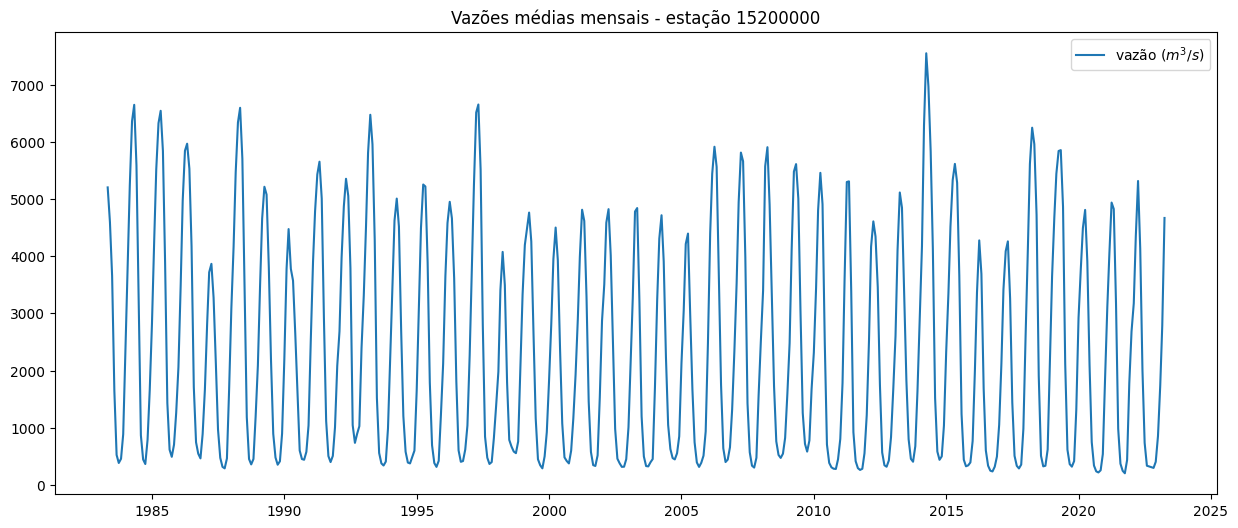

In [9]:
plt.plot(df_vazoes_medias, label='vazão ($m^3/s$)')
plt.title('Vazões médias mensais - estação 15200000')
plt.legend(loc='upper right')
plt.show()

In [10]:
# Criar a Série Temporal a partir do DataFrame criado anteriormente
serie_vazoes_medias = pandas.Series(df_vazoes_medias['Media'].values, index=df_vazoes_medias.index)

In [11]:
serie_vazoes_medias.head()

Data
1983-05-01    5203.50200
1983-06-01    4597.60840
1983-07-01    3657.54740
1983-08-01    1645.30990
1983-09-01     525.38397
dtype: float64

In [12]:
serie_vazoes_medias.size

480

In [13]:
serie_vazoes_medias.describe()

count     480.000000
mean     2408.869688
std      1930.713063
min       204.651900
25%       552.968335
50%      1824.881350
75%      4092.677100
max      7548.685500
dtype: float64